#                               Allstate Claim Severity Prediction 

## Abstract:

Allstate, a personal insurer in the United States, is continually seeking fresh ideas to improve their claims service for the over 16 million households they protect. Allstate is currently developing automated methods of predicting the cost, and hence severity, of claims. In this recruitment challenge, Kagglers are invited to show off their creativity and flex their technical chops by creating an algorithm which accurately predicts claims severity. Aspiring competitors will demonstrate insight into better ways to predict claims severity for the chance to be part of Allstate’s efforts to ensure a worry-free customer experience.

In this notebook, we have analysed the data from allstate claim severity dataset and tried to predict the loss based on the various features available in dataset. For this dataset, our main challenge is to process the 131 columns most of them were categorical having total category more than 100. One-hot-encoding is used to convert each categorical value into individual column. As part of data pre-processing, various type of log transformation is used to reduce the skew of continuous variable. The prediction of target variable has been done using H2O framework as well as using python library like sklearn. In H2O, AutoML is used to predict the loss variable which generate the score of 1143.39 which is in top 46% among all teams. Using python sklearn library, XGBoost algorithm is used with fine tuning of hyperparameters giving the score of 1107.50319 in public leader board and 1120.25985 in private leader board. This score lands us in top 17% among all teams.

## H2O Framework:

To install H2O, JRE must be install first to support H2O framework. H2O is installed using pip command after that.

In [ ]:
# required installation for h2o
! apt-get install default-jre
!java -version
! pip install h2o

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.10-63ubuntu1~02).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.
openjdk version "10.0.2" 2018-07-17
OpenJDK Runtime Environment (build 10.0.2+13-Ubuntu-1ubuntu0.18.04.4)
OpenJDK 64-Bit Server VM (build 10.0.2+13-Ubuntu-1ubuntu0.18.04.4, mixed mode)
    100% |████████████████████████████████| 120.9MB 274kB/s 
  Stored in directory: /root/.cache/pip/wheels/76/73/b8/8639930fbc56e9f26fac210f5e65dbe05a0c39396ddaf4a685
Successfully built h2o


Necessary packages is imported which is being used in this notebook.

In [0]:
# required packages
import h2o
import psutil
import pandas as pd
import numpy as np
import random
from h2o.automl import H2OAutoML

To start H2O framework, init function must be used to complete the setup of h2o. In h2o.init, parameters like maximum memory size, strick version check and port no is given. Here we have assign 6GB of memmory to h2o cluster since we have run it in google co-lab.

In [0]:
# 65535 Highest port no
port_no=random.randint(5555,55555)

# setup h2o cluster
h2o.init(strict_version_check=False,max_mem_size='6g',port=port_no) # start h2o

Checking whether there is an H2O instance running at http://localhost:31556..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "10.0.2" 2018-07-17; OpenJDK Runtime Environment (build 10.0.2+13-Ubuntu-1ubuntu0.18.04.4); OpenJDK 64-Bit Server VM (build 10.0.2+13-Ubuntu-1ubuntu0.18.04.4, mixed mode)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpuyqdt2a4
  JVM stdout: /tmp/tmpuyqdt2a4/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpuyqdt2a4/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:31556
Connecting to H2O server at http://127.0.0.1:31556... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.4
H2O cluster version age:,13 days
H2O cluster name:,H2O_from_python_unknownUser_lirmyc
H2O cluster total nodes:,1
H2O cluster free memory:,6 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


To import the train and test csv from google drive, below pydrive api is used to import the data from goole drive and dump into h20dataframe. User has to authenticate the access of the google drive when code is trying to access the file from google drive.

In [0]:
# install pydrive to connect the google drive
!pip install -U -q PyDrive
 
# google authentication to access the drive  
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 19.8MB/s 


File from google drive will be accessed from it file id. We have to provide file id fro each file which is train.csv and test.csv. Below is the code to do the same operation.

In [0]:
# get the file using file id
train_downloaded = drive.CreateFile({'id': '1cNP3WwM-737kOfTrTMJPQ9b0VOMwAzbQ'})
train_downloaded.GetContentFile('train.csv')
test_downloaded = drive.CreateFile({'id': '1sEkIqJYPnrtAhuiZJDEbprOupkiPgpjl'})
test_downloaded.GetContentFile('test.csv')  

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exceptio

Importing the train.csv file and dumping into h2o dataframe.

In [0]:
# import csv file and dump into h2o dataframe
train_data = h2o.import_file('train.csv')


Parse progress: |█████████████████████████████████████████████████████████| 100%


Importing the train.csv file and dumping into h2o dataframe.

In [0]:
# import csv file and dump into h2o dataframe
test_data = h2o.import_file('test.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


Dataset contain few continuous variable and multiple categorical variable. It is required to do data preprocessing in order to get the best accuracy from the model. Initially, we have tried taking log/sqrt of continuous variable since those featurs were highly skewed.  We have further imporved this features in our python version of code.

In [0]:
# take log transformation of continuoes feature
test_data['cont1'] = test_data['cont1'].log()
test_data['cont2'] = test_data['cont2'].log()
test_data['cont4'] = test_data['cont4'].log()
test_data['cont5'] = test_data['cont5'].log()
test_data['cont8'] = test_data['cont8'].log()

# take square root of continuoes feature
test_data['cont10'] = test_data['cont10'].sqrt()
test_data['cont13'] = test_data['cont13'].log()
test_ids = test_data['id']
test_data = test_data.drop('id')

In [0]:
# take log transformation of continuoes feature
train_data['cont1'] = train_data['cont1'].log()
train_data['cont2'] = train_data['cont2'].log()
train_data['cont4'] = train_data['cont4'].log()
train_data['cont5'] = train_data['cont5'].log()
train_data['cont8'] = train_data['cont8'].log()

# take square root of continuoes feature
train_data['cont10'] = train_data['cont10'].sqrt()
train_data['cont13'] = train_data['cont13'].log()
train_data['loss'] = train_data['loss'].log()
train_data = train_data.drop('id')

In [0]:
test_data.columns

['cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9',
 'cat10',
 'cat11',
 'cat12',
 'cat13',
 'cat14',
 'cat15',
 'cat16',
 'cat17',
 'cat18',
 'cat19',
 'cat20',
 'cat21',
 'cat22',
 'cat23',
 'cat24',
 'cat25',
 'cat26',
 'cat27',
 'cat28',
 'cat29',
 'cat30',
 'cat31',
 'cat32',
 'cat33',
 'cat34',
 'cat35',
 'cat36',
 'cat37',
 'cat38',
 'cat39',
 'cat40',
 'cat41',
 'cat42',
 'cat43',
 'cat44',
 'cat45',
 'cat46',
 'cat47',
 'cat48',
 'cat49',
 'cat50',
 'cat51',
 'cat52',
 'cat53',
 'cat54',
 'cat55',
 'cat56',
 'cat57',
 'cat58',
 'cat59',
 'cat60',
 'cat61',
 'cat62',
 'cat63',
 'cat64',
 'cat65',
 'cat66',
 'cat67',
 'cat68',
 'cat69',
 'cat70',
 'cat71',
 'cat72',
 'cat73',
 'cat74',
 'cat75',
 'cat76',
 'cat77',
 'cat78',
 'cat79',
 'cat80',
 'cat81',
 'cat82',
 'cat83',
 'cat84',
 'cat85',
 'cat86',
 'cat87',
 'cat88',
 'cat89',
 'cat90',
 'cat91',
 'cat92',
 'cat93',
 'cat94',
 'cat95',
 'cat96',
 'cat97',
 'cat98',
 'cat99',
 'cat100',
 'cat101

Take target varible into y and rest will be added into x.

In [0]:
# target variable
y = 'loss'

# create list for features
x = [col for col in train_data.columns if col != y ]

AutoML is automatic machine learning algorithm which run set of models on dataset provided into parameter and train each model on the same to get better accuracy. AutoML also do stacking of ensemble  models  which algorithm has already train the data on it. Techniques like one-hot-encoding and hyperparameter tunning will be automatically taken care by AutoML algorithm. We have removed the XGBoost algorithm as per the discussion with professor.

In [0]:
# AutoML without xgboost
auto_model = H2OAutoML(max_models=10,seed=1234,max_runtime_secs=3600*6,exclude_algos=["XGBoost"])

# train AutoML
auto_model.train(x=x,y=y,training_frame=train_data)

AutoML progress: |████████████████████████████████████████████████████████| 100%


Leaderboard shows all models which trained on the given dataset in the ascending order based on the loss function.


In [0]:
# automl leaderboard
lb = auto_model.leaderboard
lb.head(rows=lb.nrows) 

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20190301_122806,0.291101,0.539538,0.291101,0.4168,0.0639199
StackedEnsemble_BestOfFamily_AutoML_20190301_122806,0.292526,0.540857,0.292526,0.417928,0.0640752
GBM_grid_1_AutoML_20190301_122806_model_1,0.295324,0.543437,0.295324,0.420865,0.0643711
GBM_2_AutoML_20190301_122806,0.297917,0.545817,0.297917,0.422885,0.0646055
GBM_1_AutoML_20190301_122806,0.298133,0.546015,0.298133,0.42296,0.0646462
GBM_3_AutoML_20190301_122806,0.298973,0.546784,0.298973,0.42348,0.0647011
DeepLearning_1_AutoML_20190301_122806,0.300896,0.54854,0.300896,0.424569,0.065013
GBM_4_AutoML_20190301_122806,0.302036,0.549578,0.302036,0.425846,0.065001
GBM_5_AutoML_20190301_122806,0.30243,0.549936,0.30243,0.425669,0.0650628
GLM_grid_1_AutoML_20190301_122806_model_1,0.318097,0.564001,0.318097,0.440537,0.0665769


In [0]:
# To get the leader of AutoML algorithm
auto_model.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20190301_122806
No model summary for this model


ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.23555145143535214
RMSE: 0.48533643118495867
MAE: 0.37388336828602403
RMSLE: 0.05779152346812914
R^2: 0.6426307812986011
Mean Residual Deviance: 0.23555145143535214
Null degrees of freedom: 188317
Residual degrees of freedom: 188310
Null deviance: 124125.34686802176
Residual deviance: 44358.578231402644
AIC: 262166.2893043658

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.2911007174417809
RMSE: 0.5395375032764459
MAE: 0.41679958205424467
RMSLE: 0.06391987178355957
R^2: 0.5583536619200354
Mean Residual Deviance: 0.2911007174417809
Null degrees of freedom: 188317
Residual degrees of freedom: 188310
Null deviance: 124126.22133413701
Residual deviance: 54819.5049072013
AIC: 302040.73289040214


We have tried to predict the target variable using the best model of AutoML but model give error due to categorical variables. We have tried to reach the engineers of H2O and found that it is existing defect in the H2O 3.22 version which will be fixed in upcoming relase. Please refer below link for more information.

https://0xdata.atlassian.net/browse/PUBDEV-6266

In [0]:
# predict target variable using leader model
y_pred = auto_model.leader.predict(test_data)

stackedensemble prediction progress: |█████ (failed)


OSError: ignored

Since stacked ensemble model doesn't work for this dataset. we have used the 3rd best model from the leader board to predict target variable.

In [0]:
# Get Third best model from the leader board
model6 = h2o.get_model(auto_model.leaderboard.as_data_frame()['model_id'][2])

In [0]:
# predict the target variable
loss_pred = model6.predict(test_data)

gbm prediction progress: |████████████████████████████████████████████████| 100%


/usr/local/lib/python3.6/dist-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'cat89' has levels not trained on: [F]
  warnings.warn(w)
/usr/local/lib/python3.6/dist-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'cat92' has levels not trained on: [E, G]
  warnings.warn(w)
/usr/local/lib/python3.6/dist-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'cat96' has levels not trained on: [H]
  warnings.warn(w)
/usr/local/lib/python3.6/dist-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'cat99' has levels not trained on: [U]
  warnings.warn(w)
/usr/local/lib/python3.6/dist-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'cat103' has levels not trained on: [M]
  warnings.warn(w)
/usr/local/lib/python3.6/dist-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'cat106' has levels not trained on: [Q]
  warnings.warn(w)
/usr/local/lib/python3.6/dist-packages/h2o/job.py:69: UserW

In [0]:
loss_pred.head()

predict
7.37521
7.55873
9.15336
8.67703
6.72708
7.65227
7.52222
6.81097
7.73643
8.05834


During the data preprocessing, we have taken log of target variable to train the model so we have to rescale it by taking exponential of it.

In [0]:
# take exponential of target variable
loss_pred_act = loss_pred.exp()

In [0]:
loss_pred_act.shape

(125546, 1)

In [0]:
# combine id and target variable
submit_data = test_ids.cbind(loss_pred_act)
submit_data.columns = ['id','loss']

In [0]:
submit_data.head()

id,loss
4,1523.27
6,1964.07
9,9552.08
12,5763.96
15,741.753
17,2075.69
21,1634.98
28,1047.09
32,2479
43,2679.47


In [0]:
# mount the google drive 
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [0]:
# conver h2o dataframe to pandas dataframe
df_submit = submit_data.as_data_frame(use_pandas=True,header=True)

# write dataframe to csv
df_submit.to_csv('submit2.csv')

# save the csv into google drive
!cp submit2.csv drive/My\ Drive/

### Conclusion from H2O Framework

The submission file is created using third best model from AutoML algorithm which gave MAE of 1143.39819 which comes under top 46% amoung all teams. The score could be better using stacked ensemble models which is the leader model from the AutoML algorithm but due to existing bug present in the H2O version 3.22, It is not possible to run the stacked ensemble model from AutoML with this dataset.

## Using Python Sklearn Library:

#### Importing Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(13,9))
import seaborn
from subprocess import check_output
import seaborn as sns
%matplotlib inline
import xgboost as xgb

#### Importing training data

In [5]:
train = pd.read_csv('allstate-claims-severity\\train.csv')

#### Segregating Categorical and Continuous Variables

In [6]:
catvar=[col for col in train.columns if 'cat' in col]
contvar=[col for col in train.columns if 'cont' in col]

#### We have total 116 categorical variables

In [7]:
catvar

['cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9',
 'cat10',
 'cat11',
 'cat12',
 'cat13',
 'cat14',
 'cat15',
 'cat16',
 'cat17',
 'cat18',
 'cat19',
 'cat20',
 'cat21',
 'cat22',
 'cat23',
 'cat24',
 'cat25',
 'cat26',
 'cat27',
 'cat28',
 'cat29',
 'cat30',
 'cat31',
 'cat32',
 'cat33',
 'cat34',
 'cat35',
 'cat36',
 'cat37',
 'cat38',
 'cat39',
 'cat40',
 'cat41',
 'cat42',
 'cat43',
 'cat44',
 'cat45',
 'cat46',
 'cat47',
 'cat48',
 'cat49',
 'cat50',
 'cat51',
 'cat52',
 'cat53',
 'cat54',
 'cat55',
 'cat56',
 'cat57',
 'cat58',
 'cat59',
 'cat60',
 'cat61',
 'cat62',
 'cat63',
 'cat64',
 'cat65',
 'cat66',
 'cat67',
 'cat68',
 'cat69',
 'cat70',
 'cat71',
 'cat72',
 'cat73',
 'cat74',
 'cat75',
 'cat76',
 'cat77',
 'cat78',
 'cat79',
 'cat80',
 'cat81',
 'cat82',
 'cat83',
 'cat84',
 'cat85',
 'cat86',
 'cat87',
 'cat88',
 'cat89',
 'cat90',
 'cat91',
 'cat92',
 'cat93',
 'cat94',
 'cat95',
 'cat96',
 'cat97',
 'cat98',
 'cat99',
 'cat100',
 'cat101

#### We have total 14 continuous variables

In [8]:
contvar

['cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13',
 'cont14']

#### Plotting Heatmap to check co-related variables

It is clear for the map, that variables 'cont9' and 'cont12' are highly co-related and hence we'll drop them for our dataset.

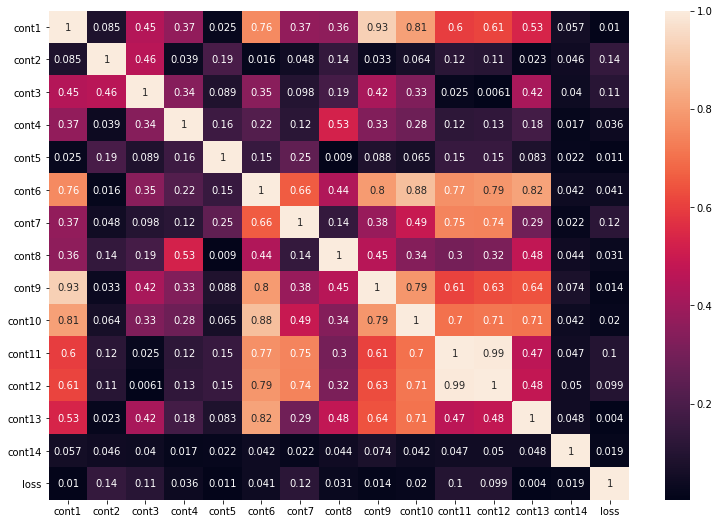

In [9]:
# taking absolute of correlation value
correlationMatrix =train[contvar+['loss']].corr().abs()
plt.subplots(figsize=(13, 9))

# Plotting heat map 
sns.heatmap(correlationMatrix,annot=True)
plt.show()

#### Dropping co-related variables with threshold gretaer than 90%

In [10]:
def trimm_correlated(df_in, threshold):
    # calculating pearson correlation 
    df_corr = df_in.corr(method='pearson', min_periods=1)
    
    # masking the upper triangle in correlation matrix
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    
    # get the required correlation matrix 
    df_out = df_in[un_corr_idx]
    return df_out

In [11]:
# Removing the corelated variables by calling the above defined function
contvar = trimm_correlated(train[contvar],0.90)

In [12]:
contvar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Data columns (total 12 columns):
cont1     188318 non-null float64
cont2     188318 non-null float64
cont3     188318 non-null float64
cont4     188318 non-null float64
cont5     188318 non-null float64
cont6     188318 non-null float64
cont7     188318 non-null float64
cont8     188318 non-null float64
cont10    188318 non-null float64
cont11    188318 non-null float64
cont13    188318 non-null float64
cont14    188318 non-null float64
dtypes: float64(12)
memory usage: 17.2 MB


#### Plotting Density plot to see how our loss variable is distributed

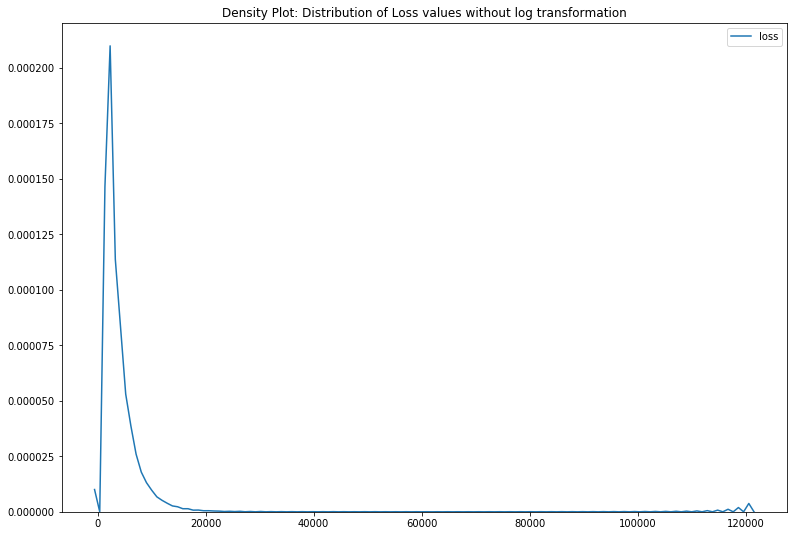

In [13]:
plt.subplots(figsize=(13, 9))
plt.title('Density Plot: Distribution of Loss values without log transformation')

# Plotting the density plot for Loss variable
sns.kdeplot(train.loss)

Since, the log variable is not normally distributed so we are using numpy.log1p function which returns natural logarithm of one plus the input array, element-wise.

Note: For real-valued input, log1p is accurate also for x so small that 1 + x == 1 in floating-point accuracy.

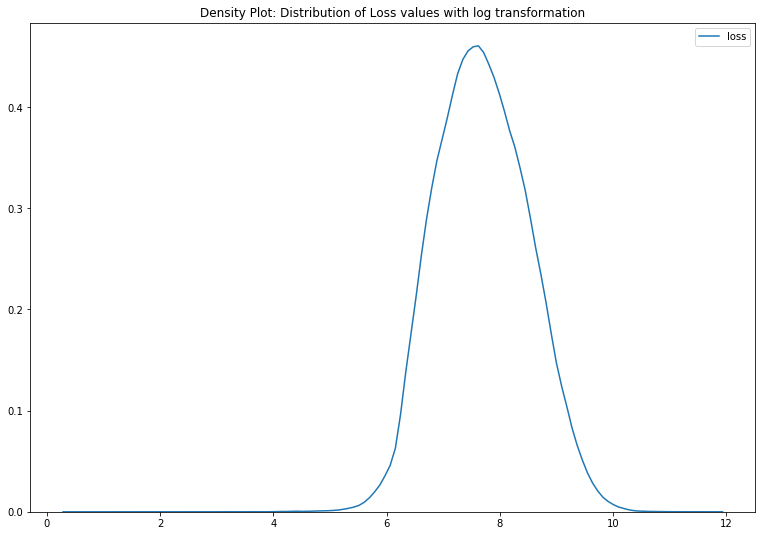

In [14]:
from scipy import stats
plt.subplots(figsize=(13, 9))
plt.title('Density Plot: Distribution of Loss values with log transformation')

# Plotting the density plot for Loss variable
sns.kdeplot(np.log1p(train.loss))

#### Plotting how our continuous variables are distributed before log transformation

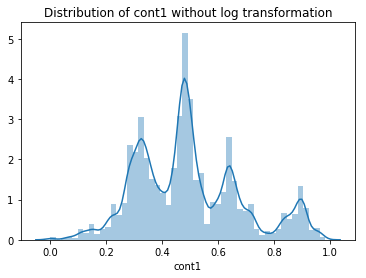

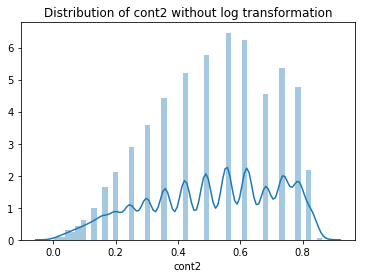

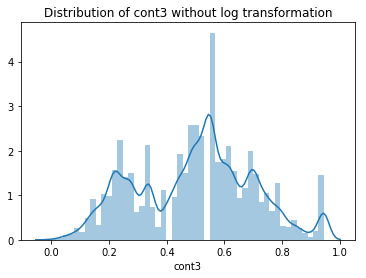

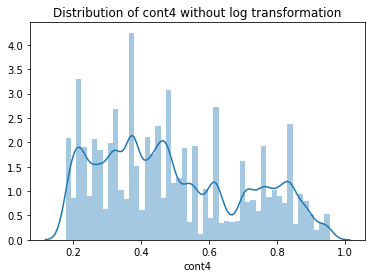

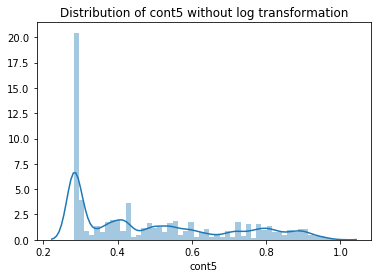

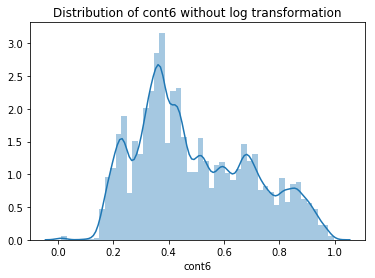

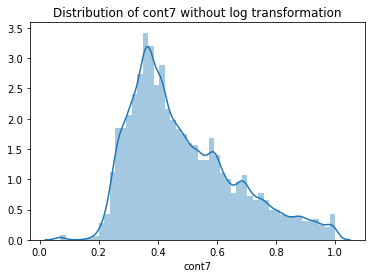

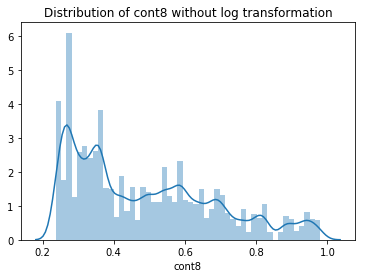

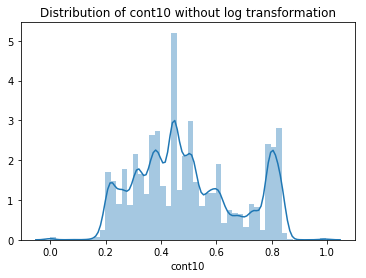

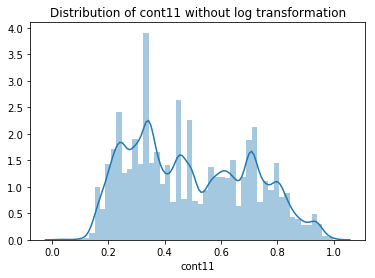

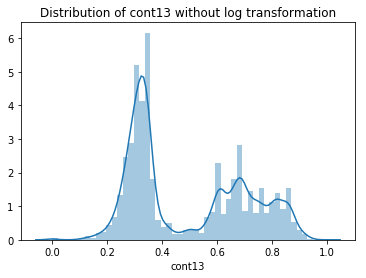

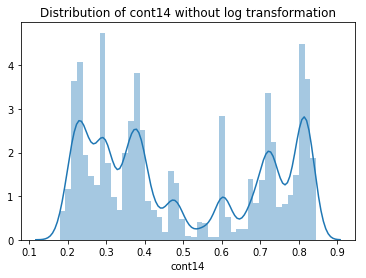

In [15]:
for col in contvar:
    plt.title('Distribution of ' +col+ ' without log transformation')
    
    # Plotting the distribution plot for continuous variable in training dataset
    sns.distplot(train[col])
    plt.show()

#### Plotting how our continuous variables are distributed after log transformation

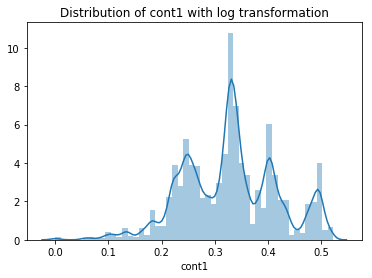

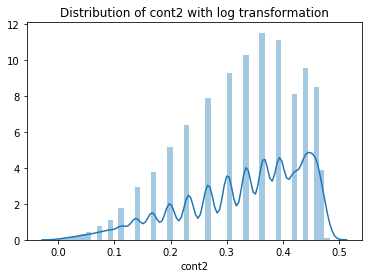

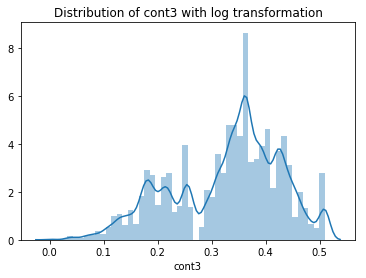

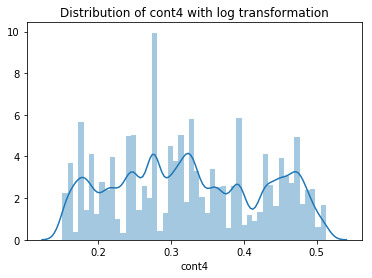

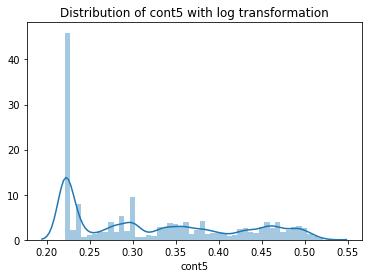

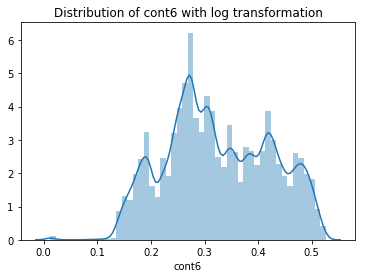

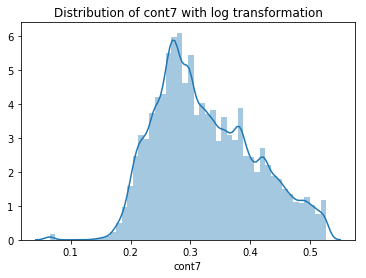

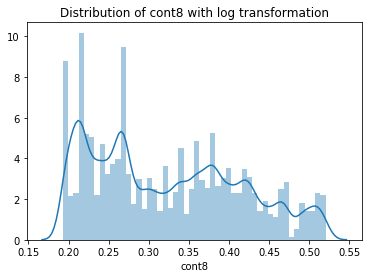

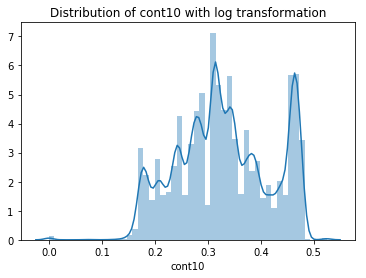

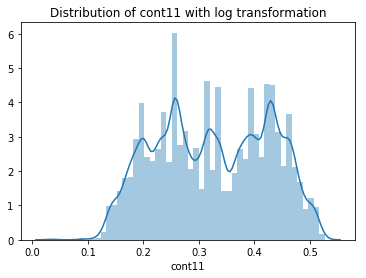

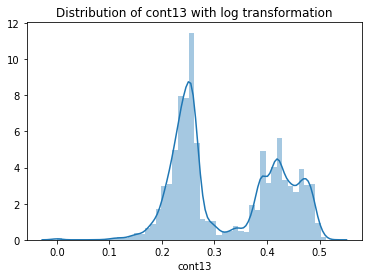

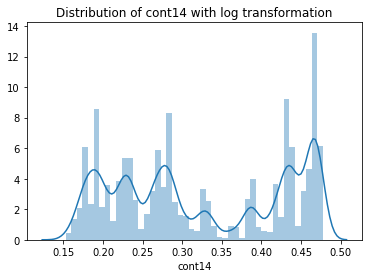

In [27]:
for col in contvar:
    plt.title('Distribution of ' +col+ ' with log transformation')
    
    # Plotting the distribution plot for continuous variable in training dataset
    sns.distplot(np.log1p(train[col]))
    plt.show()

#### Dropping highly correlated variables from training dataset

In [16]:
train.drop(['cont9', 'cont12'], axis=1, inplace=True)

#### Taking logarithmic transformation of all continuous variables in the training dataset

In [17]:
for col in contvar:
    train[col] = np.log1p(train[col])

#### Taking logarithmic transformation of 'loss' variable in the training dataset

In [19]:
train['loss'] = np.log1p(train['loss'])

#### Reading test data

In [20]:
test = pd.read_csv('allstate-claims-severity\\test.csv')

#### Dropping highly correlated variables(i.e. 'cont9' and 'cont20') from test dataset

In [21]:
test.drop(['cont9', 'cont12'], axis=1, inplace=True)

#### Taking logarithmic transformation of  all continuous variables in the test dataset

In [22]:
for col in contvar:
    test[col] = np.log1p(test[col])

In [23]:
test['loss'] = np.nan
joined = pd.concat([train, test])

#### Function to calculate Mean Absolute Error

Note: MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight

In [24]:
def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    
    # calculating MAE between prediction and actual observation
    return 'mae', mean_absolute_error(np.exp(preds), np.exp(labels))

In below code we are taking all the categorical variables in the training and test dataset, comparing all the unique values in training dataset vs the test dataset and storing the mismatch values in the train(which are not present in test) and test (which are not present in train) in remove_train and remove_test respectively.

In [25]:
# For each categorical variable in training and test, the below code will replace any missing category among training and test with NAN value
for column in list(train.select_dtypes(include=['object']).columns):
    if train[column].nunique() != test[column].nunique():
        
        # Creating set of all unique values of categorical column in training dataset
        set_train = set(train[column].unique())
        
        # Creating set of all unique values of categorical column in test dataset
        set_test = set(test[column].unique())
        remove_train = set_train - set_test
        remove_test = set_test - set_train
        # Taking union of categories missing in either test or train data for each individual coulmn
        remove = remove_train.union(remove_test)
        
        # Function to replace any missing category for each categorical column in train and test dataset with NAN value
        def filter_cat(x):
            if x in remove:
                return np.nan
            return x
        
        # Replacing all the missing categories in training and test with NAN value
        joined[column] = joined[column].apply(lambda x: filter_cat(x), 1)

        
        
# Dividing train and test from joined dataframe based on loss value, i.e. if loss value is not null it belongs to train data and if loss value is null it belongs to test data
train = joined[joined['loss'].notnull()]
test = joined[joined['loss'].isnull()]

# Creating dummies for categorical variables in train and test dataset
train = pd.get_dummies(train)
test = pd.get_dummies(test)


# Setting target variable
y = train['loss']
ids = test['id']
X = train.drop(['loss', 'id'], 1)
X_test = test.drop(['loss', 'id'], 1)

#### Fitting XGB model

Note: XGBoost (Extreme Gradient Boosting) belongs to a family of boosting algorithms and uses the gradient boosting (GBM) framework at its core.

In [ ]:
RANDOM_STATE = 2016
params = {
        'min_child_weight': 100,
        'eta': 0.01,
        'colsample_bytree': 0.7,
        'max_depth': 12,
        'subsample': 0.7,
        'alpha': 1,
        'learning_rate' : 0.03,
        'gamma': 1,
        'silent': 1,
        'objective' : 'reg:linear',
        'verbose_eval': True,
        'seed': RANDOM_STATE
    }

# grouping both dataset and outcome using xgb.DMatrix
xgtrain = xgb.DMatrix(X, label=y)
xgtest = xgb.DMatrix(X_test)

# Training our XGB Model
model = xgb.train(params, xgtrain, int(2012 / 0.9), feval=evalerror)

# Calculating inverse of numpy's log1p
prediction = np.expm1(model.predict(xgtest))

#### Writing to CSV file

In [ ]:
submission = pd.DataFrame()

# Storing prediction in 'loss' column of submission file
submission['loss'] = prediction

# Storing test ids in 'id' column of submission file
submission['id'] = ids

#Writing result to CSV file
submission.to_csv('sub_kamran.csv', index=False)

# Conclusion:

After trying two approach, Below are the results for each approach.

* H2O Framework: 
H2O is high performance framework for machine learning algorithm which support most of the machine algorithm. AutoML is one of the machine learning algorithms available in H2O framework which train various models on provided dataset and give the list of models based on their performance in leader board. In this Notebook, We have used AutoML algorithm to train on allstate claim severity dataset and predict the "loss" target variable. We have performed some basic data pre-processing steps like log and square root transformation for continuous feature to reduce the skew. Implementation of H2O for this kaggle compition not used by any kaggler. We have trained the AutoML algorithm on dataset and get top 10 models based on their performance by excluding xgboost algorithm. Using H2O, We have used AutoML algorithm to train on dataset to get the best model. We have taken 3rd best model which GBM to predict the target variable("loss"). After prediction, we got MAE as 1143.39 which comes under top 46% amoung all teams. Stacked ensebmle model could have done better job than GBM model but due to existing issue in the H2O 3.22 version, we were not able to used stacked ensebmle model to predict the target variable.

* Python Sklearn Library: Using sklearn library, We have train our model on dataset with fine tuning of hyperparameter to get the best MAE score which is 1120.25985 on private leader board and 1107.50319 on public leader board. This score comes under top 17% among all the teams of this competition. During this, approaches like data pre-processing, fine tuning of hyperparameter of xgboost, one-hot-encoding, collinearity check and removal of uncommon categories between train and test dataset help us to achieve better results.

## Contributions statement:

Author has completed this kaggle challenge using two approach which included H2O framework by implementing the AutoML algorithm and using python sklearn library after fine tuning of xgboost algorithm to get better result. Author has also done experiment on data pre-processing by using log, sqrt or log1p transformation to train and test data to reduce the skew of individual continuous variable. Below approaches has been implemented in this code.

Akshay's Contribution:

* Used H2O framework to get extract the train and test file from google drive and do initial data pre-processing where we have used log and square root transformation to reduce the skew of continuous features and convert into normal distributed data.

* AutoML is used to train on dataset to get the best model. Author has used the GBM model to predict the target variable with MAE score of 1143.39. 

* Final submission file created for H2O code and upload to google drive to submit into kaggle competition.

* Using python, Author has tried log(1+x) transformation for data pre-processing which give less skewed data and help model to increase the accuracy.


Kamran's Contribution:

* Comparison is shown using graph for continuous feature which include values before transformation and after transformation.
* Density plot are also shown in the notebook to check the distribution of features.

* Author has checked the correlation between continuous features and remove some based on their correlation value.

* Remove the same category values from categorical features which are not common between train and test file.

* One-hot-encoding technique is implemented to convert categorical features.

* Fine tuning of XGBoost is performed to get better accuracy for this dataset.

* Create submission file for python implemented code which give MAE score 1120.25985.


## Summary:

We have taken Marius Bock kernel from kaggle as base for this assignment and implemented EDA, feature engineering and one-hot encoding along with fitting xgboost algorithm from python sklearn library to achieve better result. XGBoost algorithm is one of the hot favourite algorithms among kaggles. Almost all kaggle compitition winner are using xgboost algorithm directly or in the form of stacked ensemble model. We have used xgboost algorithm with fine tuning of hyperparameter which is different than what is available in public kernels. We have tried to achieve less MAE score using log1p transformation of continuous features which is different than other public kernels. Our code removes few categorical values from categorical features which are not common between train and test dataset to reduce the variance. one-hot-encoding of categorical features helped the model to capture more detail from the data to predict better result. Combination of this approaches help us to achieve MAE score of 1120.25985 in private leader board and 1107.50319 in public leader board. 

Note: We have taken Marius Bock kernel from kaggle as base for this assignment. 

Reference Kernel Link: https://www.kaggle.com/mariusbo/xgb-lb-1106-33084

## Citations:

* https://xgboost.readthedocs.io/en/latest/python/python_api.html

* https://www.kaggle.com/c/allstate-claims-severity

* http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html

* http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-munging.html

* https://www.kaggle.com/modkzs/lexical-encoding-feature-comb?scriptVersionId=441521

* https://www.kaggle.com/iglovikov/xgb-1114

* https://www.kaggle.com/aliajouz/singel-model-lb-1117

* https://www.kaggle.com/c/allstate-claims-severity/discussion/25609

## Licence:

MIT License

Copyright (c) 2018 Akshay Patel

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.